/tmp/ipython-input-168465116.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='ISO-8859-1')


Roll Number: 102303219
Parameters: a_r=0.2, b_r=1.5
------------------------------
Mean (mu):      25.8164
Lambda:         0.00146
Constant (c):   0.02157
------------------------------


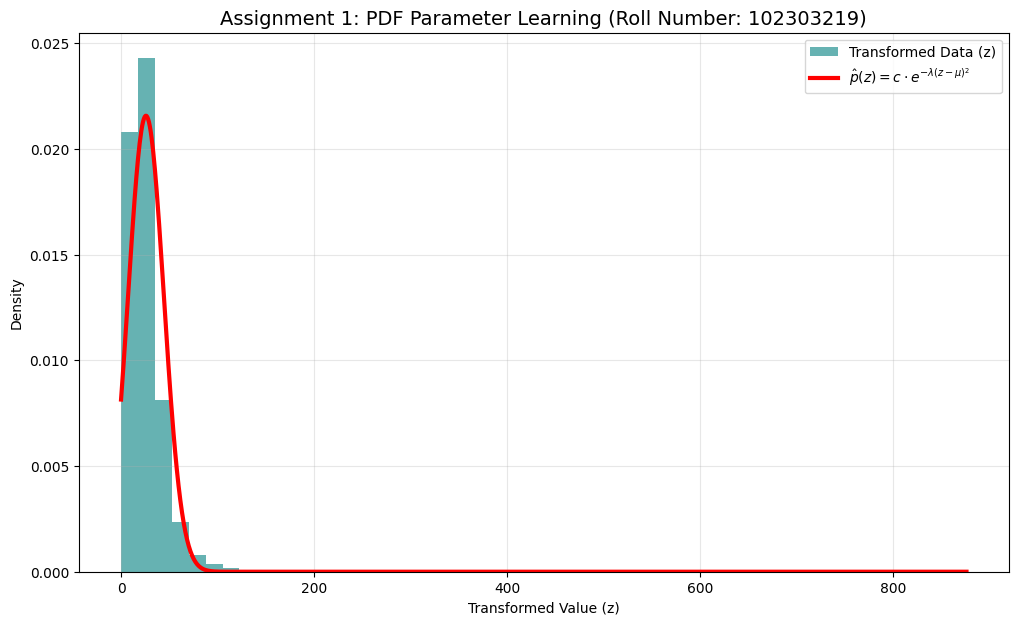

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# 1. LOAD DATA
# ==========================================
try:
    file_path = '/content/data.csv'
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
except FileNotFoundError:
    try:
        file_path = 'data.csv'
        df = pd.read_csv(file_path, encoding='ISO-8859-1')
    except FileNotFoundError:
        print("Error: Dataset not found. Please upload 'city_day.csv' or 'data.csv'.")
        exit()

# Handle column name case sensitivity (NO2 vs no2)
col_name = 'no2' if 'no2' in df.columns else 'NO2'
x = df[col_name].dropna().values

# ==========================================
# 2. TRANSFORM DATA (Roll No: 102303219)
# ==========================================
r = 102303219

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print(f"Roll Number: {r}")
print(f"Parameters: a_r={a_r}, b_r={b_r}")

# Apply Transformation
z = x + a_r * np.sin(b_r * x)

# ==========================================
# 3. CALCULATE PDF PARAMETERS
# ==========================================
mu = np.mean(z)
sigma = np.std(z)
lambda_val = 1 / (2 * sigma**2)
c = 1 / (sigma * np.sqrt(2 * np.pi))

print("-" * 30)
print(f"Mean (mu):      {mu:.4f}")
print(f"Lambda:         {lambda_val:.5f}")
print(f"Constant (c):   {c:.5f}")
print("-" * 30)

# ==========================================
# 4. GENERATE THE GRAPH
# ==========================================
plt.figure(figsize=(12, 7))

# A. Plot the Histogram of Actual Data (z)
count, bins, ignored = plt.hist(z, bins=50, density=True, alpha=0.6, color='teal', label='Transformed Data (z)')

# B. Plot the Theoretical Curve (The Red Line)
z_range = np.linspace(min(z), max(z), 1000)

p_z = c * np.exp(-lambda_val * (z_range - mu)**2)

# Plot the red line
plt.plot(z_range, p_z, linewidth=3, color='red', label=r'$\hat{p}(z) = c \cdot e^{-\lambda(z-\mu)^2}$')

# C. Styling
plt.title(f"Assignment 1: PDF Parameter Learning (Roll Number: {r})", fontsize=14)
plt.xlabel("Transformed Value (z)")
plt.ylabel("Density")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

# Show and Save
plt.show()